<a href="https://colab.research.google.com/github/LucaCappelletti94/covidxpert/blob/master/image_processing_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pipeline for image processing
The main goal of this Jupyter notebook is to prototype a working pipeline to preprocess chestxrays images.

In [55]:
! git clone https://github.com/LucaCappelletti94/covidxpert
! pip install ./covidxpert

fatal: destination path 'covidxpert' already exists and is not an empty directory.
Processing ./covidxpert
  Created wheel for covidxpert: filename=covidxpert-1.0.0-cp36-none-any.whl size=28583023 sha256=a829e94a3eaa32eea451f571f7bb0fc865332e65a5fdedc2deb9d75c1bac6103
  Stored in directory: /tmp/pip-ephem-wheel-cache-scoc42cu/wheels/91/b2/1a/121977a2d0c0f857e9913a344245cb5554bad5db8632499194
Successfully built covidxpert
  Found existing installation: covidxpert 1.0.0
    Uninstalling covidxpert-1.0.0:
      Successfully uninstalled covidxpert-1.0.0


In [0]:
from covidxpert import load_image, perspective_correction
import os
from glob import glob
import numpy as np
from typing import List
import matplotlib.pyplot as plt
from skimage.exposure import histogram
from skimage import img_as_float
from tqdm.auto import tqdm, trange
from scipy import ndimage

In [58]:
images = glob("covidxpert/sample_dataset/*")
print(images[:10])

['covidxpert/sample_dataset/253.jpg', 'covidxpert/sample_dataset/973.jpg', 'covidxpert/sample_dataset/647.jpg', 'covidxpert/sample_dataset/318.jpg', 'covidxpert/sample_dataset/19.jpg', 'covidxpert/sample_dataset/940.jpg', 'covidxpert/sample_dataset/962.jpg', 'covidxpert/sample_dataset/541.jpg', 'covidxpert/sample_dataset/143.jpg', 'covidxpert/sample_dataset/798.jpg']


In [0]:
def cumHist(images, numImgs: int = 100,  scale_percent = (100,100)):
    """Compute The sum of all the histogram"""
    #if scale percent < 1 then it is the percentage of rescaling
    allhist = np.zeros((1, 256)) #cumulative histogram
    
    idx = np.arange(len(images))
    np.random.shuffle(images)
    im_sum = np.zeros(scale_percent)
  
    for i in trange(numImgs):
        
      
        #open the image    
        
        im = load_image(images[i])
        im = ndimage.median_filter(im, 3)
        im = ndimage.gaussian_filter(im, sigma=5)
       
        #warp the image
        im = perspective_correction(im)
        
        # downscale image to 30%    
        width = int(im.shape[1] * scale_percent[1]) if scale_percent[1] <= 1 else scale_percent[1]
        height = int(im.shape[0] * scale_percent[0]) if scale_percent[0] <= 1 else scale_percent[0]
      
        dim = (width, height)
        im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
      #  plt.imshow(image, cmap="gray")
      #  plt.show()

        im = img_as_float(im)
        imD = im/np.max(im)
      
        im_sum = np.sum([imD, im_sum], axis = 0)

        hist, hist_centers = histogram(im, nbins = 256)
        hist = hist / hist.max()
        allhist = np.sum([allhist, hist], axis = 0)

        # image_max is the dilation of im with a 20*20 structuring element
        # It is used within peak_local_max function
    #    image_max = ndi.maximum_filter(im, size=5, mode='constant')

   # plt.plot(hist_centers, allhist.ravel(), lw=2)
   # plt.show()
    return hist, hist_centers, im_sum


In [0]:
def applyThresh(images, minthr = 0, maxthr = 255, numImgs: int = 100 ,  scale_percent = (100,100)):
    """Compute The sum of all the histogram"""
    #if scale percent < 1 then it is the percentage of rescaling
  
    for i in trange(numImgs):
        #open the image    
        im = load_image(images[i])
        im = ndimage.median_filter(im, 3)
        im = ndimage.gaussian_filter(im, sigma=5)
       
        #warp the image
        im = perspective_correction(im)
        
        # downscale image to 30%    
        width = int(im.shape[1] * scale_percent[1]) if scale_percent[1] <= 1 else scale_percent[1]
        height = int(im.shape[0] * scale_percent[0]) if scale_percent[0] <= 1 else scale_percent[0]
      
        dim = (width, height)
        im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
      #  plt.imshow(image, cmap="gray")
      #  plt.show()
        
        im = img_as_float(im)
        mask = (im < minthr) | (im> maxthr)
        
        im[im < minthr] = minthr
        im[im > maxthr] = maxthr

        plt.subplot(1,2,1)
        plt.imshow(im, cmap = 'gray')
        plt.subplot(1,2,2)
        plt.imshow(mask, cmap = 'gray')

        plt.show()


In [0]:
def smooth(x,window_len=11):
  

    y=ndimage.filters.gaussian_filter1d(x, sigma = window_len/6)
    return y

def affinity_cluster(vals:np.ndarray):
    # affinity propagation clustering
    from numpy import unique
    from numpy import where
    from sklearn.datasets import make_classification
    from sklearn.cluster import AffinityPropagation
    from matplotlib import pyplot
    # define dataset
    X = vals
    # define the model
#    if amax(myaffinity)==0:       
#    model = AffinityPropagation(damping=0.6)
#    else:
#    X = myaffinity
    
    model = AffinityPropagation(damping=0.6)
    # fit the model
    model.fit(X)
    # assign a cluster to each example
    yhat = model.predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
        # show the plot
        pyplot.show()
    return yhat

In [50]:
import cv2

real_bad = load_image(real_bad_path)
bad = load_image(bad_path)
medium = load_image(medium_path)
good = load_image(good_path)
problem = load_image(problem_path)
perspective_correction(problem)

AttributeError: ignored

In [0]:
from scipy.signal import find_peaks, medfilt
hist, hist_centers, sum_im = cumHist(images, 1000)


[ 67 168 233]
[ 24 121 211]


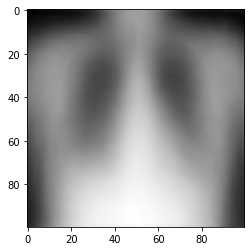

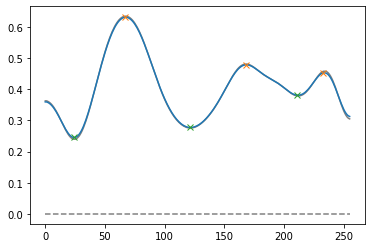

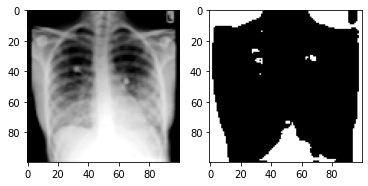

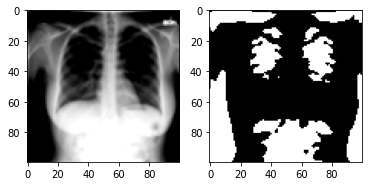

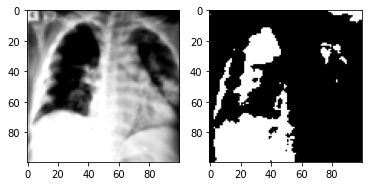

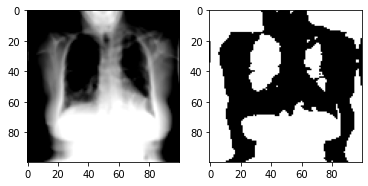

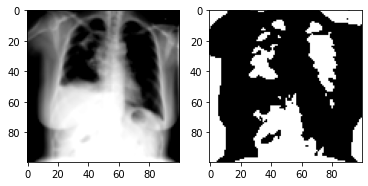

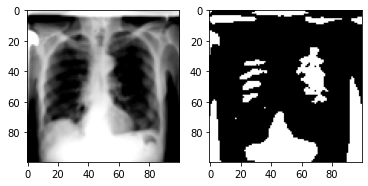

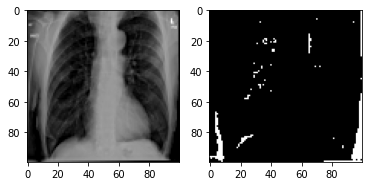

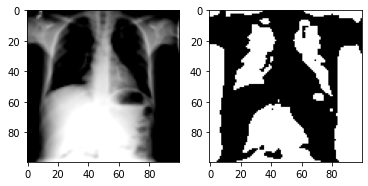

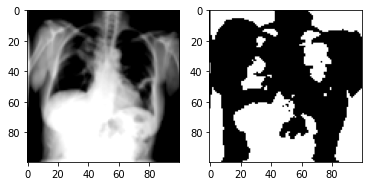

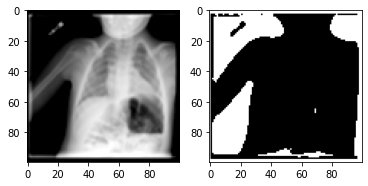

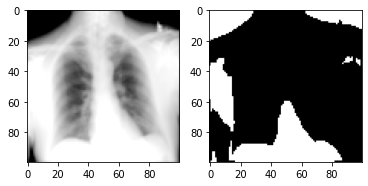

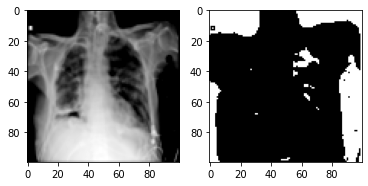

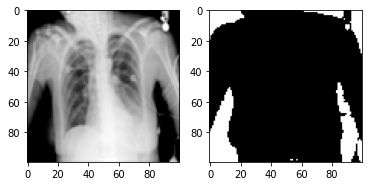

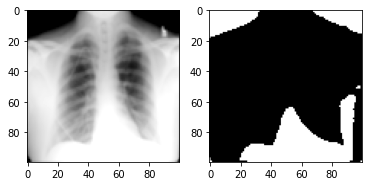

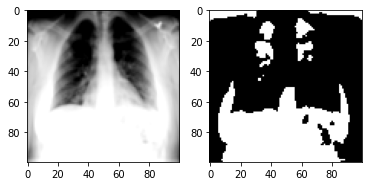

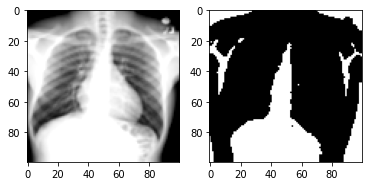

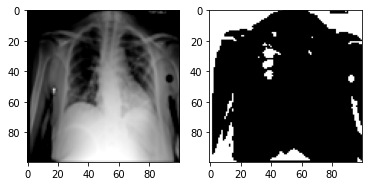

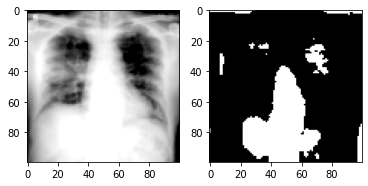

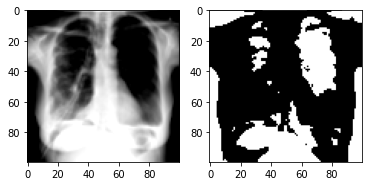

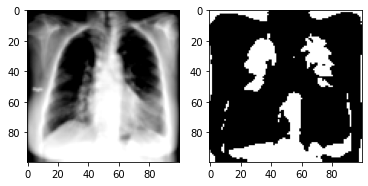

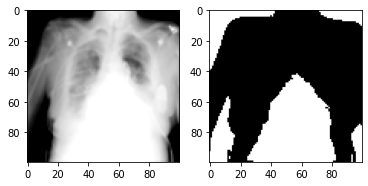

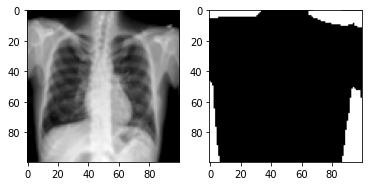

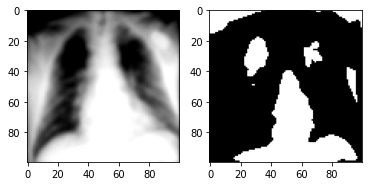

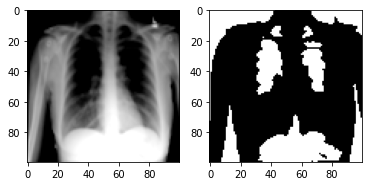

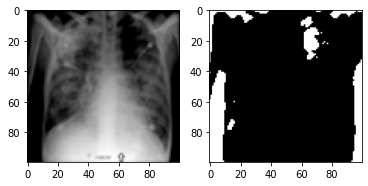

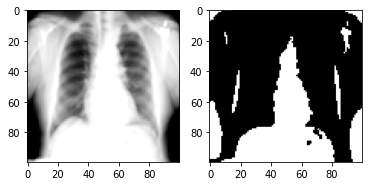

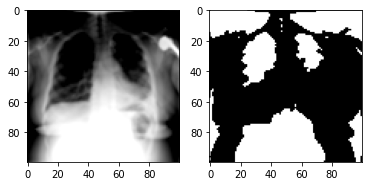

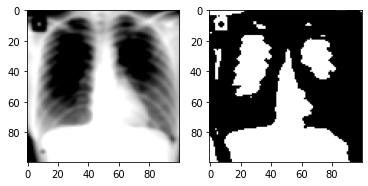

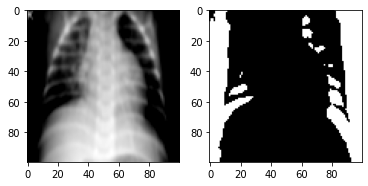

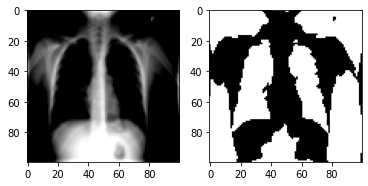

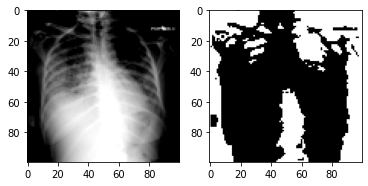

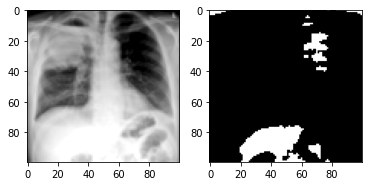

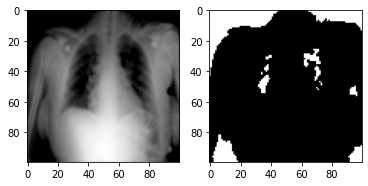

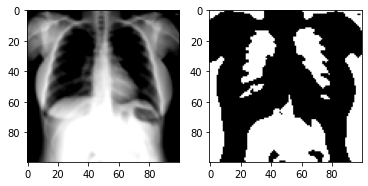

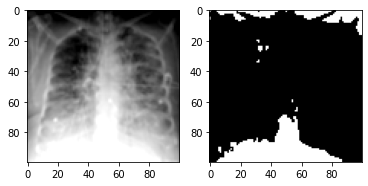

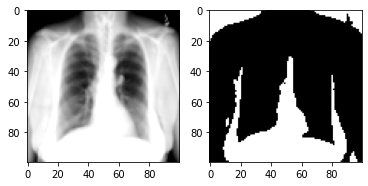

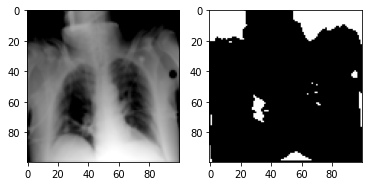

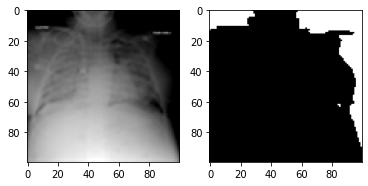

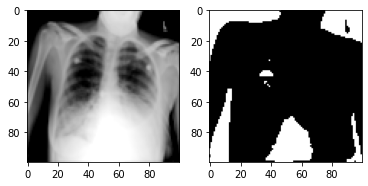

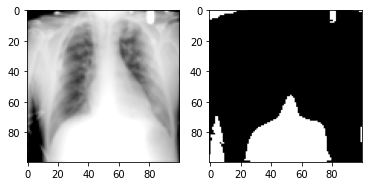

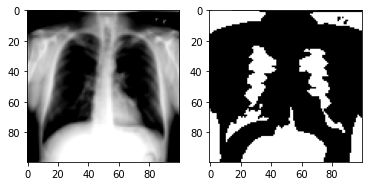

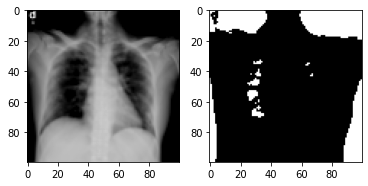

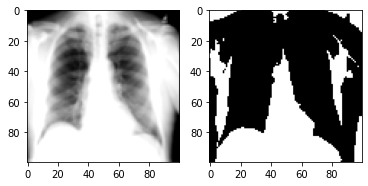

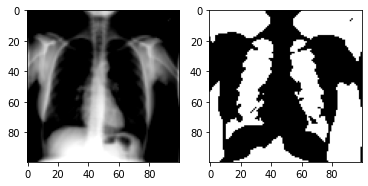

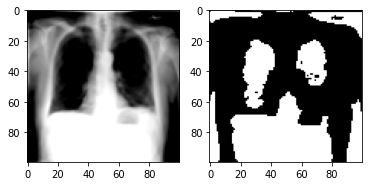

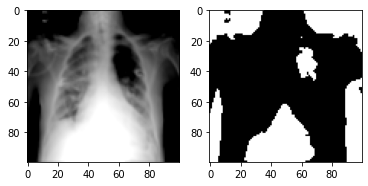

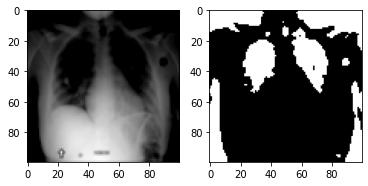

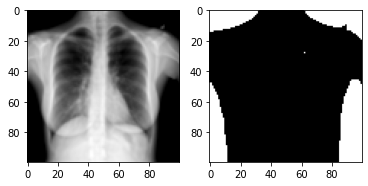

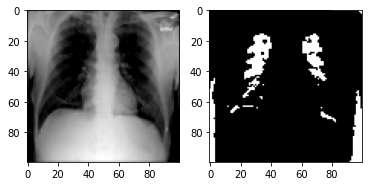

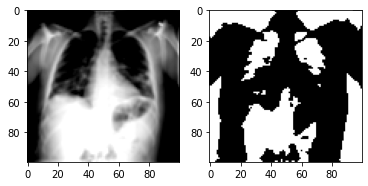

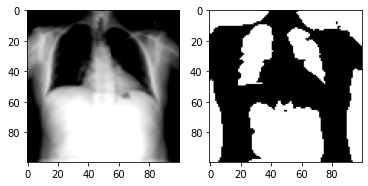

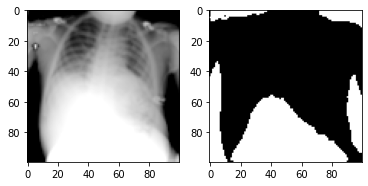

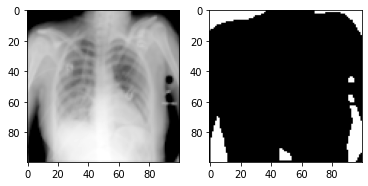

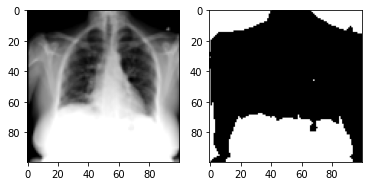

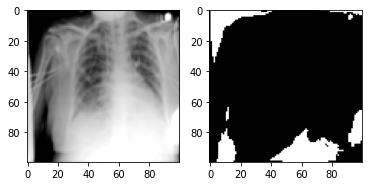

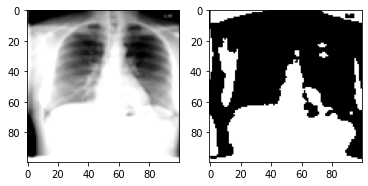

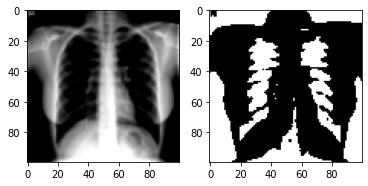

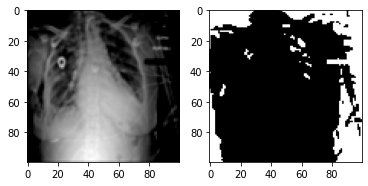

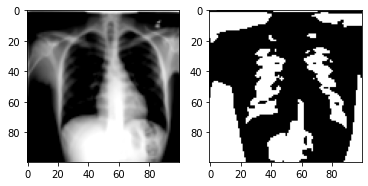

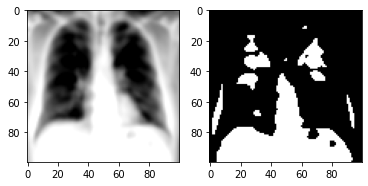

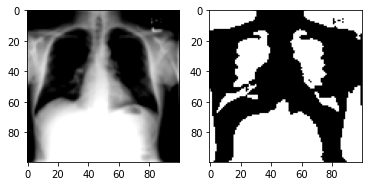

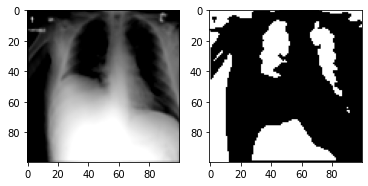

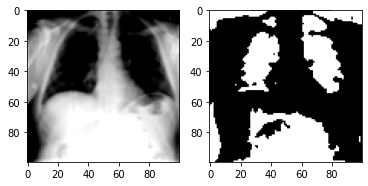

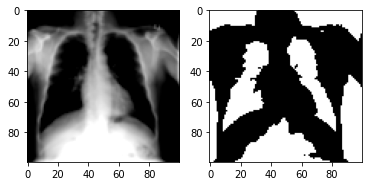

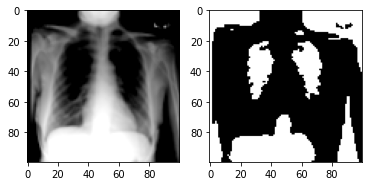

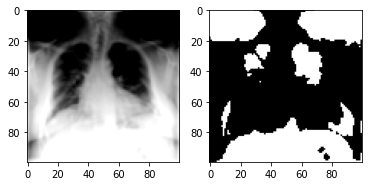

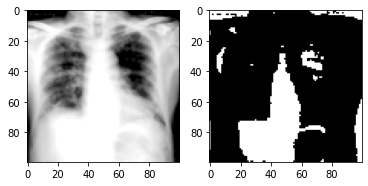

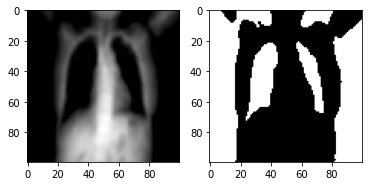

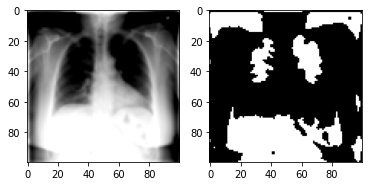

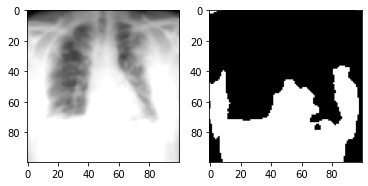

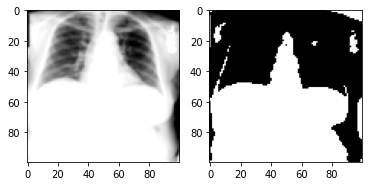

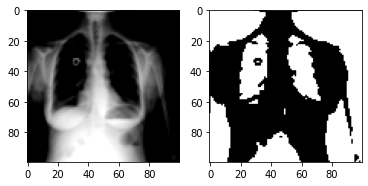

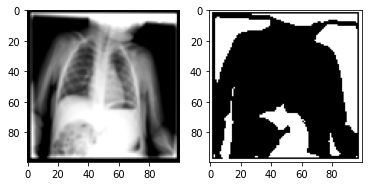

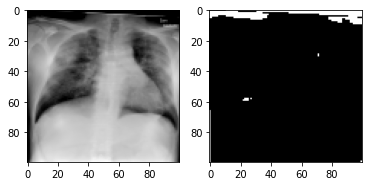

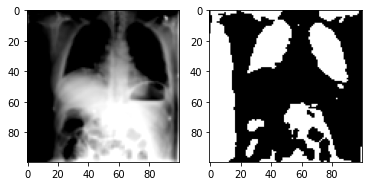

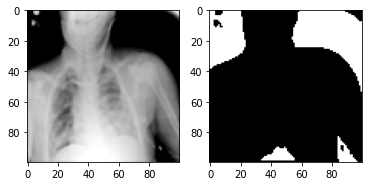

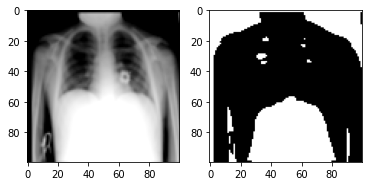

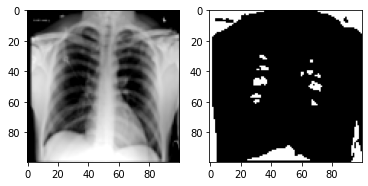

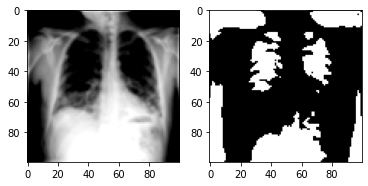

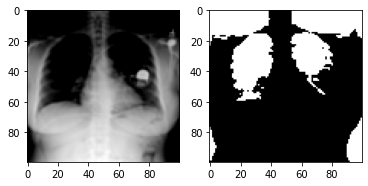

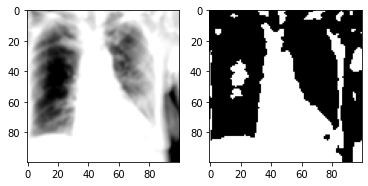

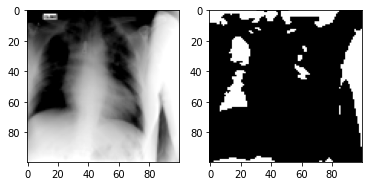

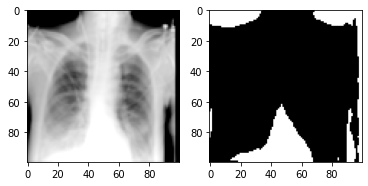

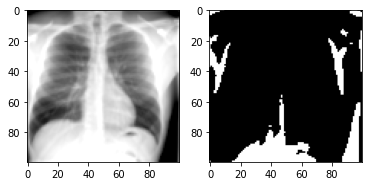

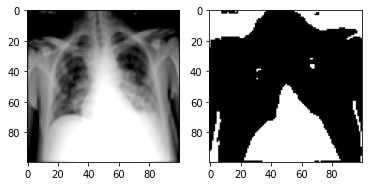

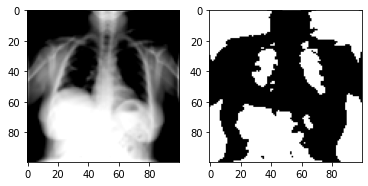

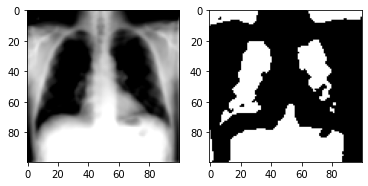

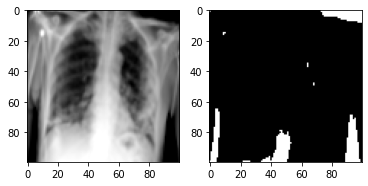

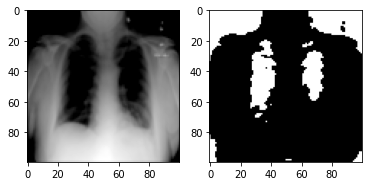

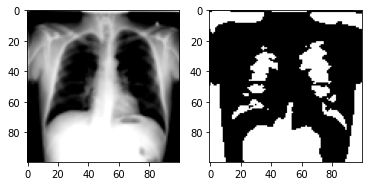

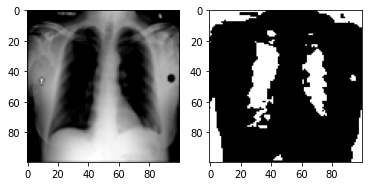

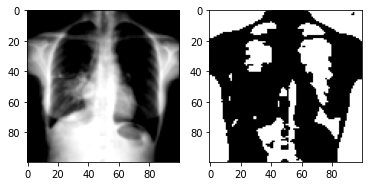

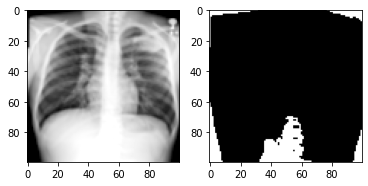

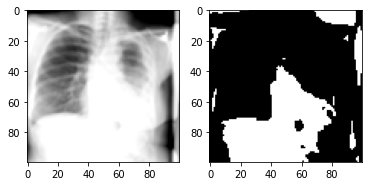

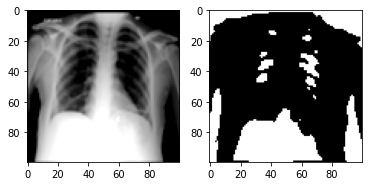

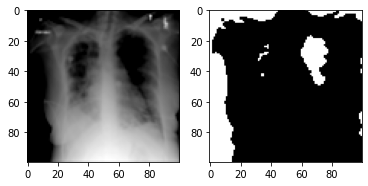

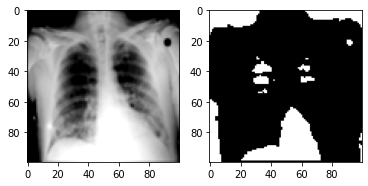

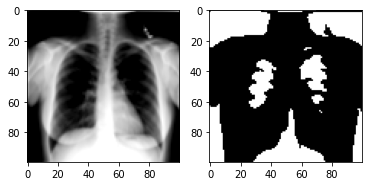

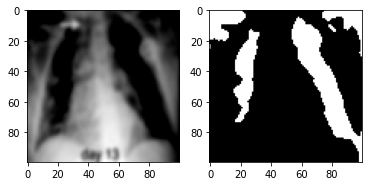

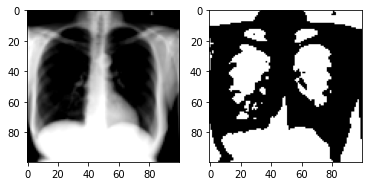

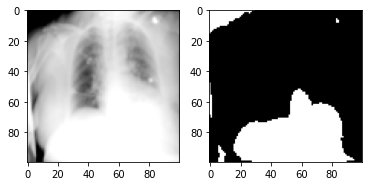

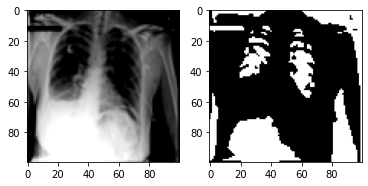

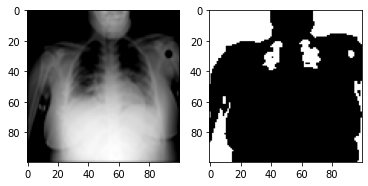

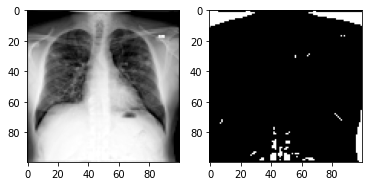

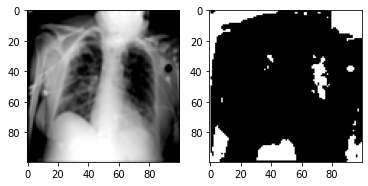

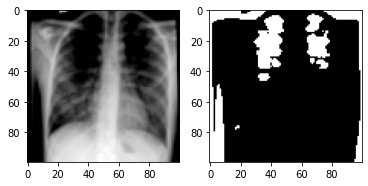

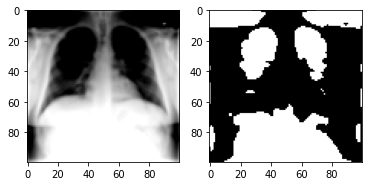

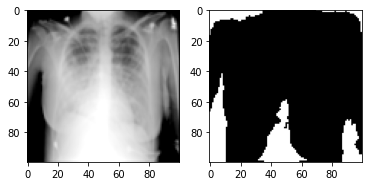

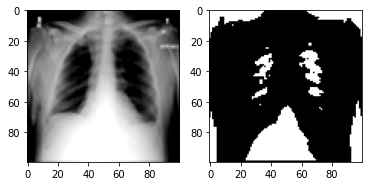

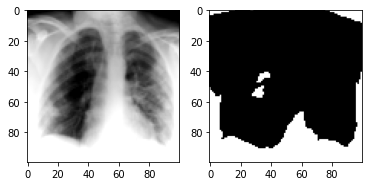

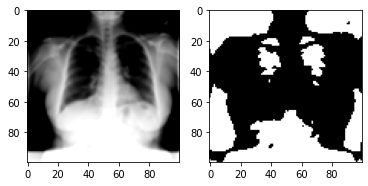

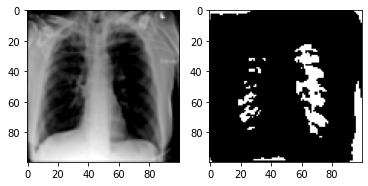

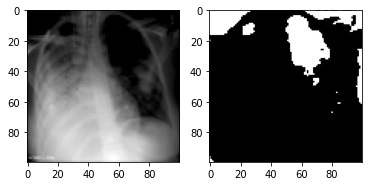

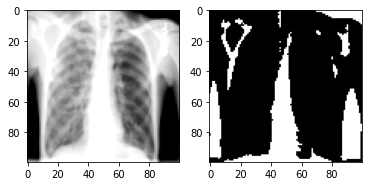

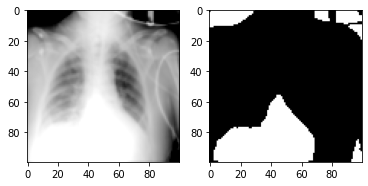

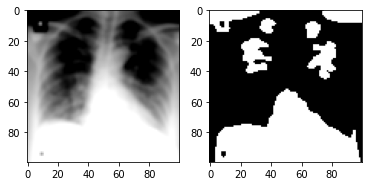

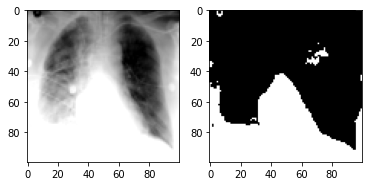

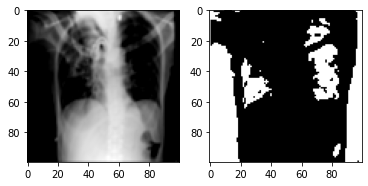

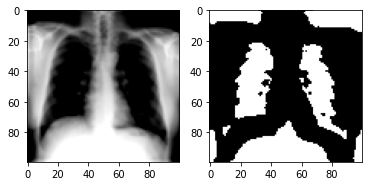

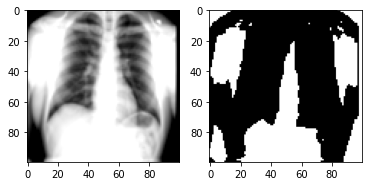

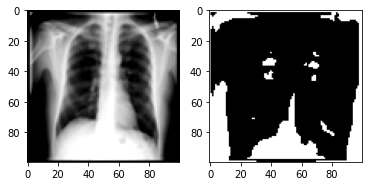

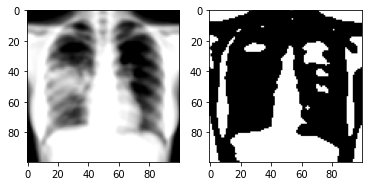

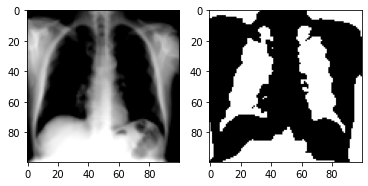

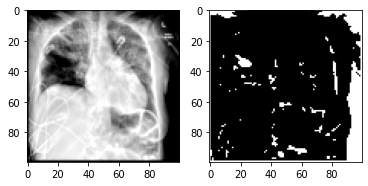

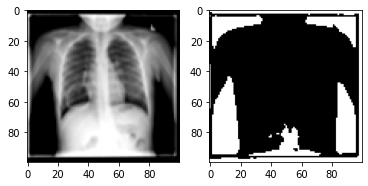

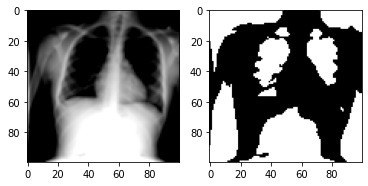

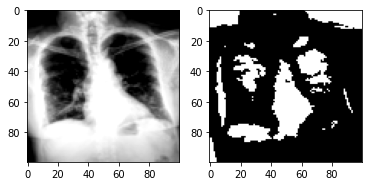

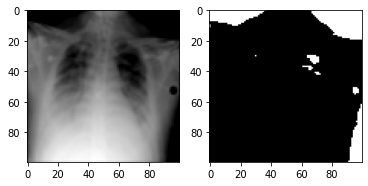

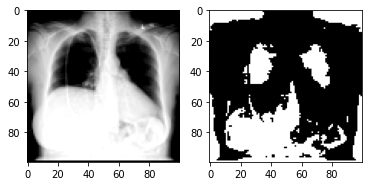

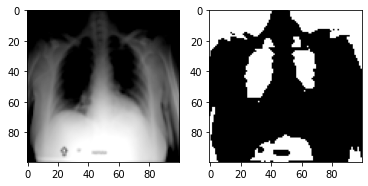

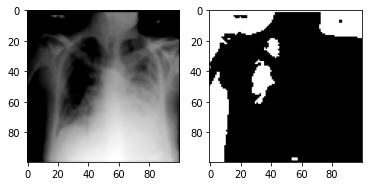

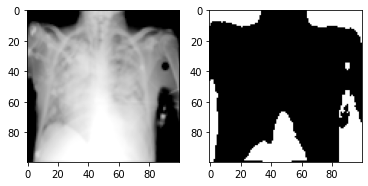

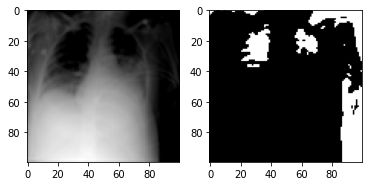

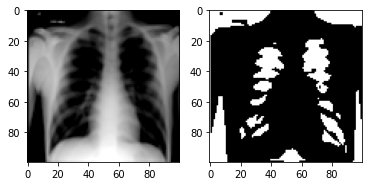

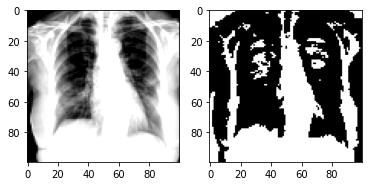

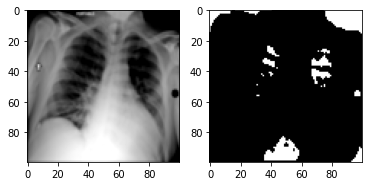

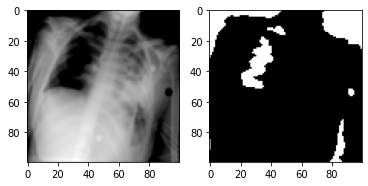

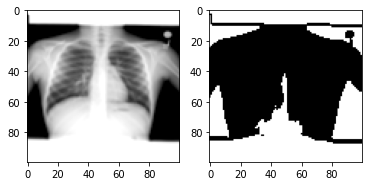

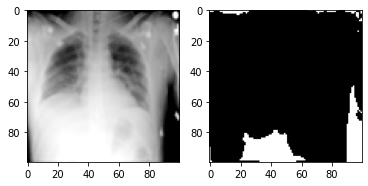

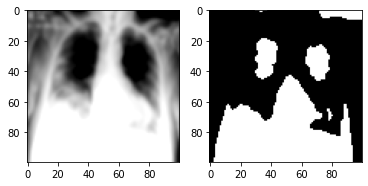

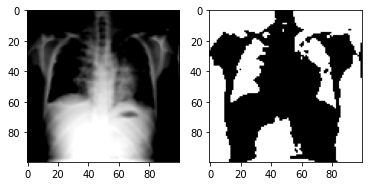

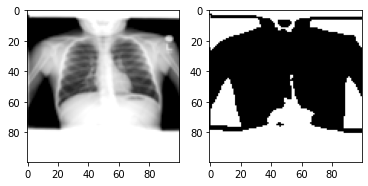

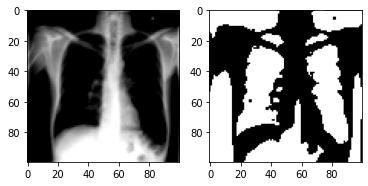

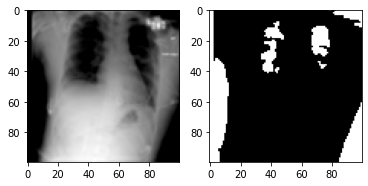

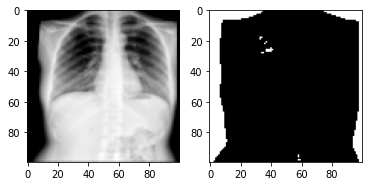

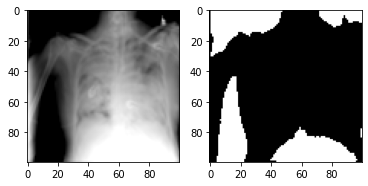

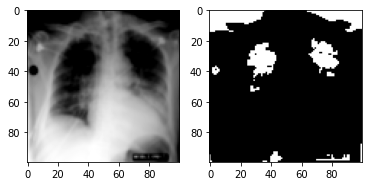

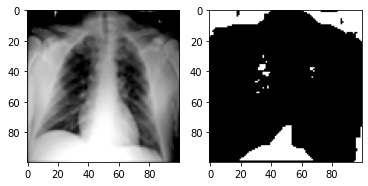

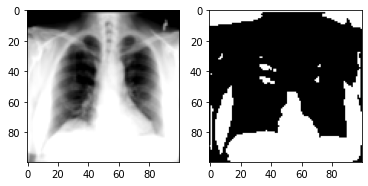

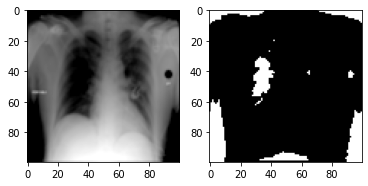

In [102]:
plt.imshow(sum_im, cmap="gray")
dist = 11
plt.figure()
plt.plot(hist, color = 'gray')
hist = medfilt(ndimage.filters.gaussian_filter1d(hist, 3))
maxima, _ = find_peaks(hist, height=0, distance = dist)
print(maxima)
minima, _ = find_peaks(np.max(hist)-hist, height=0, distance = dist)
print(minima)

plt.plot(hist)

plt.plot(maxima, hist[maxima], "x")
plt.plot(minima, hist[minima], "x")
plt.plot(np.zeros_like(hist), "--", color="gray")
plt.show()

applyThresh(images, maxima[0]/255, minima[len(minima)-1]/255, 150 )



In [0]:
sum_im < minima[0] or sum_im > minima[len(minima)-1]


NameError: name 'smooth' is not defined


from skimage.exposure import histogram
from numpy import add
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage import img_as_float
from scipy.spatial import distance_matrix, distance
import tqdm.auto as tqdm
scale_percent = 30 # percent of original size
for image in (wreal_bad, wbad, wmedium, wgood):
    im = img_as_float(image)
    
    width = int(im.shape[1] * scale_percent / 100)
    height = int(im.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
    # image_max is the dilation of im with a 20*20 structuring element
    # It is used within peak_local_max function
    image_max = ndi.maximum_filter(im, size=5, mode='constant')

    # Comparison between image_max and im to find the coordinates of local maxima
    coordinates = peak_local_max(im, min_distance=20)
    
    points = image[coordinates[:,0], coordinates[:,1]]
    
    pointsS = np.column_stack((points,
                              np.true_divide(coordinates[:,0],max(coordinates[:,0])), 
                              np.true_divide(coordinates[:,1],max(coordinates[:,1]))))
 
    
    myaffinity = distance_matrix(pointsS, pointsS)
    myaffinity = np.true_divide(myaffinity, np.amax(myaffinity))
    
#    n,m = np.meshgrid(points, points, sparse=False)
  
#    pointDist = n-m
    
#    pointDist =  np.true_divide(pointDist,amax(pointDist))
#    print(points[1:5])
#    print(pointDist[1:5,1:5])
    
    #print(grid.shape)
    
#    pointsDist = distance.cdist(points, points, 'euclidean')
#    coordinateDist = distance_matrix(coordinates, coordinates)
  #  coordinateDist =  np.true_divide(coordinateDist,amax(coordinateDist))
  #  print(points.shape)
  #  print(pointDist.shape)
  #  print(coordinateDist.shape)
  #  print(pointDist[:5,:5])
    
#    print("coordinates", coordinateDist[:5,:5])
 
  #    print("points", points[0:5])
#    print(pointsDist)
#    print(coordinates.shape)
 #   print(coordinateDist)

 #   myaffinity = np.true_divide(add(pointDist,coordinateDist),2)
    print("myaffinity", myaffinity[:3,:3])
    
    print(affinity_cluster(myaffinity))
    # display results
    fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
    ax = axes.ravel()
    ax[0].imshow(im, cmap=plt.cm.gray)
    ax[0].axis('off')
    ax[0].set_title('Original')

    ax[1].imshow(image_max, cmap=plt.cm.gray)
    ax[1].axis('off')
    ax[1].set_title('Maximum filter')

    ax[2].imshow(im, cmap=plt.cm.gray)
    ax[2].autoscale(False)
    ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
    ax[2].axis('off')
    ax[2].set_title('Peak local max')

    fig.tight_layout()

    plt.show()
    
    

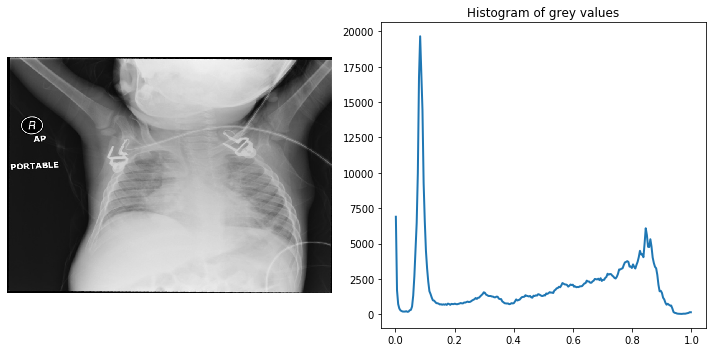

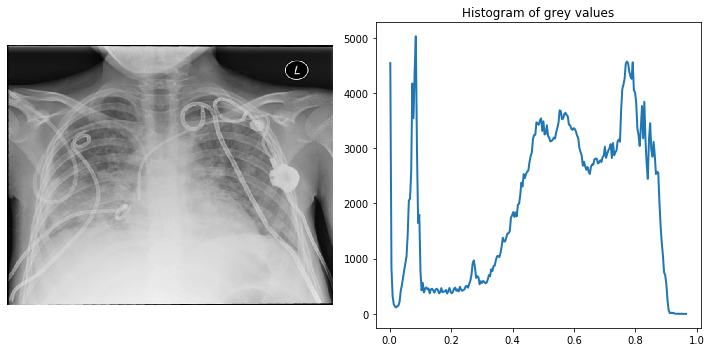

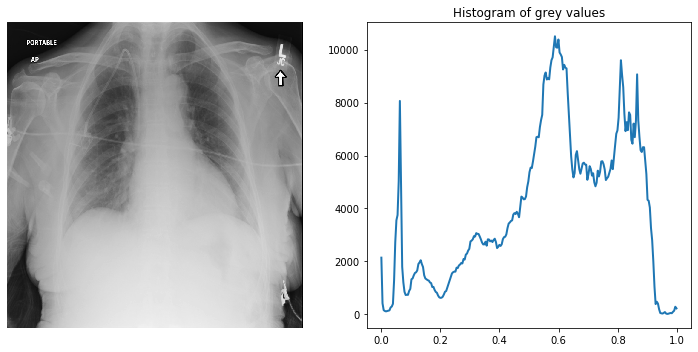

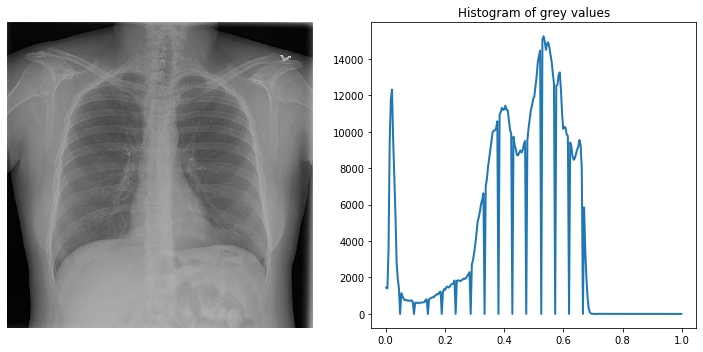

In [0]:



    hist, hist_centers = histogram(image)
    fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].axis('off')
    ax[1].plot(hist_centers, hist, lw=2)
    ax[1].set_title('Histogram of grey values')
    plt.tight_layout()

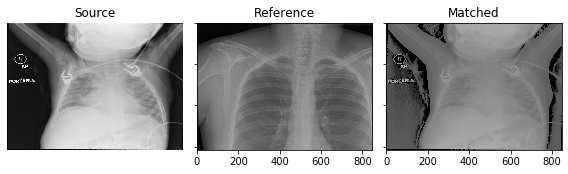

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

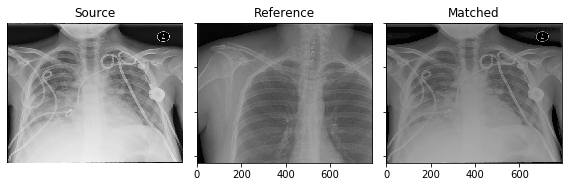

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

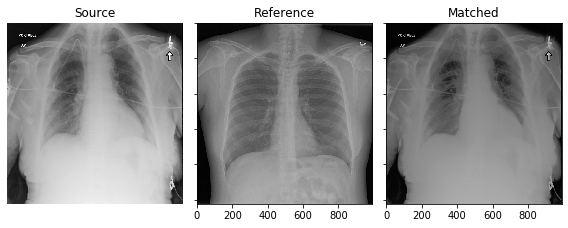

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [0]:
from skimage import exposure
from skimage.exposure import match_histograms

reference = wgood


for image in (wreal_bad, wbad, wmedium):
    matched = match_histograms(image, reference, multichannel=False)
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
    for aa in (ax1, ax2, ax3):
        aa.set_axis_off()
        ax1.imshow(image, cmap ="gray")
        ax1.set_title('Source')
        ax2.imshow(reference, cmap ="gray")
        ax2.set_title('Reference')
        ax3.imshow(matched, cmap ="gray")
        ax3.set_title('Matched')
        plt.tight_layout()
        plt.show()



Felzenszwalb's number of segments: 60
Slic number of segments: 3
Quickshift number of segments: 220


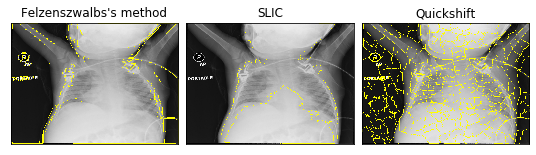

Felzenszwalb's number of segments: 67
Slic number of segments: 3
Quickshift number of segments: 229


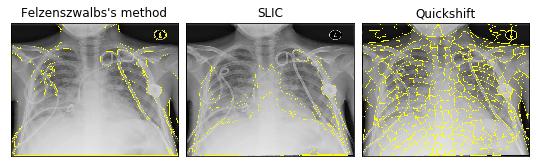

Felzenszwalb's number of segments: 78
Slic number of segments: 2
Quickshift number of segments: 484


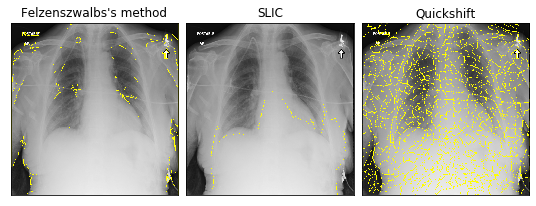

Felzenszwalb's number of segments: 93
Slic number of segments: 2
Quickshift number of segments: 481


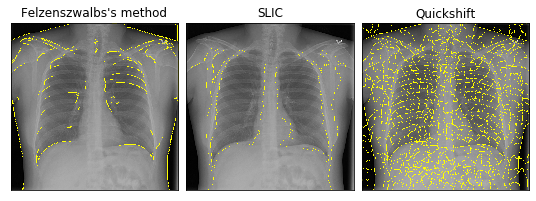

In [0]:


from __future__ import print_function




import matplotlib.pyplot as plt

import numpy as np
from skimage.segmentation import felzenszwalb, slic, quickshift
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

for image in (wreal_bad, wbad, wmedium, wgood):
    img = img_as_float(image)
    img = np.stack((img,img, img), axis=2)
    img.shape
    segments_fz = felzenszwalb(img, scale=1000, sigma=1, min_size=50)
    segments_slic = slic(img, n_segments=5, compactness=1, sigma=2)
    segments_quick = quickshift(img, kernel_size=5, max_dist=100, ratio=1)

    print("Felzenszwalb's number of segments: %d" % len(np.unique(segments_fz)))
    print("Slic number of segments: %d" % len(np.unique(segments_slic)))
 #   Radhakrishna Achanta, Appu Shaji, Kevin Smith, Aurelien Lucchi, Pascal Fua, and Sabine Suesstrunk, 
#SLIC Superpixels Compared to State-of-the-art Superpixel Methods, TPAMI, May 2012.
    print("Quickshift number of segments: %d" % len(np.unique(segments_quick)))

    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(8, 3, forward=True)
    fig.subplots_adjust(0.05, 0.05, 0.95, 0.95, 0.05, 0.05)

    ax[0].imshow(mark_boundaries(img, segments_fz))
    ax[0].set_title("Felzenszwalbs's method")
    ax[1].imshow(mark_boundaries(img, segments_slic))
    ax[1].set_title("SLIC")
    ax[2].imshow(mark_boundaries(img, segments_quick))
    ax[2].set_title("Quickshift")
    for a in ax:
        a.set_xticks(())
        a.set_yticks(())
    plt.show()